In [1]:
# from DBQuerier import DBQuerier

import os
import pandas as pd
import numpy as np
import ast

import seaborn as sns
sns.set(style="ticks")
from matplotlib import pyplot as plt

fft_interval = 5.13980000
from scipy import signal
from crawlab_toolbox import plotting as genplt

import datetime


In [6]:

responses = np.load('data/Emco_Nominal_vs_Anomalous_FFT.npy',allow_pickle=True)
frequencies = np.load('data/frequencies.npy',allow_pickle=True)
nominal_power = np.load('data/nominal_power.npy',allow_pickle=True)
anominal_power = np.load('data/anomalous_power.npy',allow_pickle=True)
nominal_rms = np.load('data/nominal_rms.npy')
anominal_rms = np.load('data/anomalous_rms.npy')

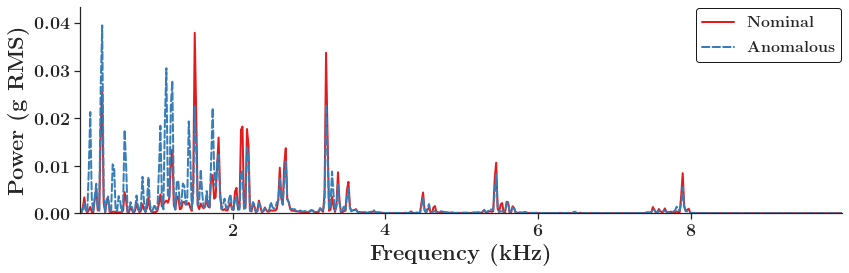

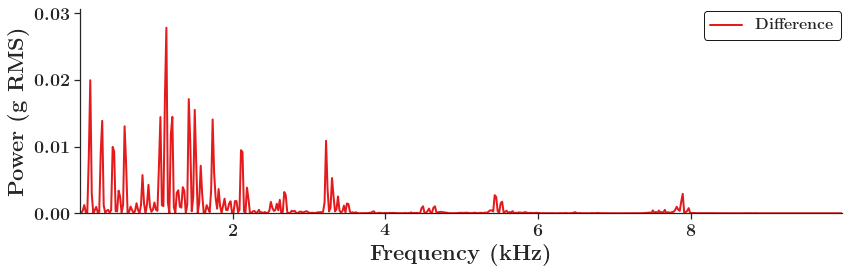

In [10]:
frequencyInterval = frequencies[1]
# combine the responses and labels to put on our 2D plot
labels = [r'Nominal','Anomalous']


# Create a 2D plot
genplt.generate_plot(frequencies/1000, # X - coordinate on the plot
              responses,# Y - coordinates on the plot
              labels,# Labels for the plot legend
              'Frequency (kHz)',# X - axis label
              r'Power (g RMS)',   # Y - axis label
              filename='Emco_Nominal_vs_Anomalous_FFT',   # Plot filename
              folder='figures',    # Specify the folder where the filename will be saved
              num_col=1,    # Specify the number of columns in the legend
              legend_loc='best', # Specify the location of the legend
              ymax=0.1,
                     log_y=False,
                     ymin=0.05,
              transparent=False,
              showplot=True,
              save_plot=True,
              template='wide',
              file_type='svg'
             )

diff = responses[1,:] - responses[0,:]
diff = np.abs(diff)

# Create a 2D plot
genplt.generate_plot(frequencies/1000, # X - coordinate on the plot
              diff,# Y - coordinates on the plot
              ['Difference'],# Labels for the plot legend
              'Frequency (kHz)',# X - axis label
              r'Power (g RMS)',   # Y - axis label
              filename='Emco_Nominal_vs_Anomalous_FFT_Diff',   # Plot filename
              folder='figures',    # Specify the folder where the filename will be saved
              num_col=1,    # Specify the number of columns in the legend
              legend_loc='best', # Specify the location of the legend
              ymax=0.1,
                     log_y=False,
                     ymin=0.05,
              transparent=False,
              showplot=True,
              save_plot=True,
              template='wide',
              file_type='svg'
             )

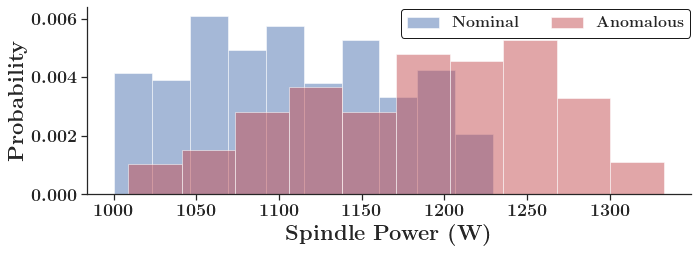

In [13]:
num_col = 2
legend_loc = 'upper right'
transparent = False

plt.figure(figsize=(12,4))
ax = plt.gca()
# the histogram of the data
n, bins, patches = plt.hist(nominal_power, 10, density=True, facecolor='b', alpha=0.50,label=r'\textbf{Nominal}')
n, bins, patches = plt.hist(anominal_power, 10, density=True, facecolor='r', alpha=0.50,label=r'\textbf{Anomalous}')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlabel(r'\textbf{Spindle Power (W)}')
plt.ylabel(r'\textbf{Probability}')
ax.legend(ncol=num_col,loc=legend_loc,framealpha=float(not transparent)).get_frame().set_edgecolor('k')
plt.grid(False)
plt.savefig('figures/Spindle_Load_Anomalous_Compare.png',transparent=True)     
plt.show()


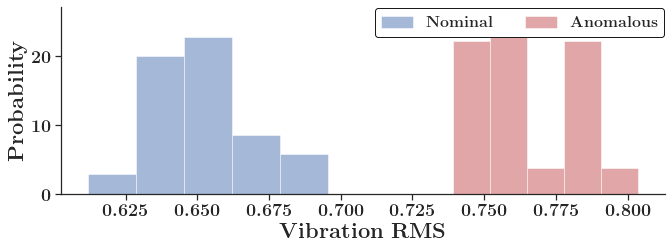

In [14]:
num_col = 2
legend_loc = 'upper right'
transparent = False

plt.figure(figsize=(12,4))
ax = plt.gca()
# the histogram of the data
n, bins, patches = plt.hist(nominal_rms, 5, density=True, facecolor='b', alpha=0.50,label=r'\textbf{Nominal}')
n, bins, patches = plt.hist(anominal_rms, 5, density=True, facecolor='r', alpha=0.50,label=r'\textbf{Anomalous}')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlabel(r'\textbf{Vibration RMS}')
plt.ylabel(r'\textbf{Probability}')
ax.legend(ncol=num_col,loc=legend_loc,framealpha=float(not transparent)).get_frame().set_edgecolor('k')
plt.grid(False)
plt.savefig('figures/RMS_Anomalous_Compare.png',transparent=True)  
plt.show()
